## LOADING DATA

In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import pandas
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/Reviews.csv'

## READING DATA

In [39]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter='|')  # Use the correct delimiter

# Display the DataFrame
df.head()

,buyerName,buyerCountry,Evaluation,buyerFeedback,buyerProductFeedBack,buyerTranslationFeedback,downVoteCount,upVoteCount,evalData,evaluationId,responsiveness,warrantyService,functionality,status
0,L***a,BR,100,Foi uma ótima compra. Item de acordo com o des...,NaN,Was a great buy. Item according to the describ...,0,0,09 Apr 2024,60080995549271264,NaN,NaN,NaN,1
1,Щ***ч,RU,100,Товар соответствует описанию. Визуально все в ...,NaN,Item as described. Visually everything is norm...,0,0,23 Jan 2024,50109430005211774,NaN,NaN,NaN,1
2,L***R,BR,100,"Possui um bom matéria, corrente bem fina pense...",NaN,"It has a good matter, very thin chain I though...",2,0,16 Dec 2023,60077029346436454,NaN,NaN,NaN,1
3,A***a,MX,100,no lo he probado pero parece lo suficientement...,NaN,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024,60078089203734379,NaN,NaN,NaN,1
4,v***r,UA,100,Замовлення було швидко доставлено в Київ через...,NaN,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024,30070787000237584,NaN,NaN,NaN,1


In [40]:
# Define meaningful column names
new_column_names = {
    'buyerName': 'Buyer Name',  # Name or identifier of the buyer who submitted the evaluation
    'buyerCountry': 'Buyer Country',  # Country of the buyer who submitted the evaluation
    'Evaluation': 'Rating',  # Evaluation or rating given by the buyer for the product
    'buyerFeedback': 'Feedback',  # Textual feedback provided by the buyer regarding their experience with the product
    'buyerProductFeedBack': 'Product Feedback',  # Specific feedback related to the product's features or performance
    'buyerTranslationFeedback': 'Translation Feedback',  # Feedback related to translation services if applicable
    'downVoteCount': 'Downvotes',  # Count of downvotes received for the evaluation
    'upVoteCount': 'Upvotes',  # Count of upvotes received for the evaluation
    'evalData': 'Evaluation Date',  # Date of the evaluation
    'evaluationId': 'Evaluation ID',  # Unique identifier for each evaluation
    'responsiveness': 'Responsiveness',  # Evaluation of the product's responsiveness
    'warrantyService': 'Warranty Service',  # Evaluation of the product's warranty service
    'functionality': 'Functionality',  # Evaluation of the product's functionality
    'status': 'Status'  # Status of the evaluation or review
}

# Rename the columns
df = df.rename(columns=new_column_names)

# Display the DataFrame with the updated column names
df.head()


,Buyer Name,Buyer Country,Rating,Feedback,Product Feedback,Translation Feedback,Downvotes,Upvotes,Evaluation Date,Evaluation ID,Responsiveness,Warranty Service,Functionality,Status
0,L***a,BR,100,Foi uma ótima compra. Item de acordo com o des...,NaN,Was a great buy. Item according to the describ...,0,0,09 Apr 2024,60080995549271264,NaN,NaN,NaN,1
1,Щ***ч,RU,100,Товар соответствует описанию. Визуально все в ...,NaN,Item as described. Visually everything is norm...,0,0,23 Jan 2024,50109430005211774,NaN,NaN,NaN,1
2,L***R,BR,100,"Possui um bom matéria, corrente bem fina pense...",NaN,"It has a good matter, very thin chain I though...",2,0,16 Dec 2023,60077029346436454,NaN,NaN,NaN,1
3,A***a,MX,100,no lo he probado pero parece lo suficientement...,NaN,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024,60078089203734379,NaN,NaN,NaN,1
4,v***r,UA,100,Замовлення було швидко доставлено в Київ через...,NaN,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024,30070787000237584,NaN,NaN,NaN,1


## Data Overview

In [41]:
# Count total rows using len() function
total_rows = len(df)
print("Total rows in the data:", total_rows)
df.shape

Total rows in the data: 2000


(2000, 14)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Buyer Name            2000 non-null   object 
 1   Buyer Country         2000 non-null   object 
 2   Rating                2000 non-null   int64  
 3   Feedback              670 non-null    object 
 4   Product Feedback      0 non-null      float64
 5   Translation Feedback  670 non-null    object 
 6   Downvotes             2000 non-null   int64  
 7   Upvotes               2000 non-null   int64  
 8   Evaluation Date       2000 non-null   object 
 9   Evaluation ID         2000 non-null   int64  
 10  Responsiveness        0 non-null      float64
 11  Warranty Service      0 non-null      float64
 12  Functionality         0 non-null      float64
 13  Status                2000 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 218.9+ KB


In [43]:
df.describe()

,Rating,Product Feedback,Downvotes,Upvotes,Evaluation ID,Responsiveness,Warranty Service,Functionality,Status
count,2000.000000,0.0,2000.000000,2000.00000,2.000000e+03,0.0,0.0,0.0,2000.0
mean,95.430000,NaN,0.084500,0.08050,4.303223e+16,NaN,NaN,NaN,1.0
std,13.557544,NaN,0.361144,0.43831,1.356860e+16,NaN,NaN,NaN,0.0
min,20.000000,NaN,0.000000,0.00000,2.004491e+16,NaN,NaN,NaN,1.0
25%,100.000000,NaN,0.000000,0.00000,3.006736e+16,NaN,NaN,NaN,1.0
50%,100.000000,NaN,0.000000,0.00000,3.007133e+16,NaN,NaN,NaN,1.0
75%,100.000000,NaN,0.000000,0.00000,6.007511e+16,NaN,NaN,NaN,1.0
max,100.000000,NaN,9.000000,10.00000,6.008124e+16,NaN,NaN,NaN,1.0


## Handling Missing Values

In [44]:

# Drop columns with all missing values
df = df.drop(columns=['Product Feedback', 'Responsiveness', 'Warranty Service', 'Functionality'])

# Drop rows with missing values in 'Feedback' and 'Translation Feedback' columns
df = df.dropna(subset=['Feedback', 'Translation Feedback'])

# Display the cleaned DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Buyer Name            670 non-null    object
 1   Buyer Country         670 non-null    object
 2   Rating                670 non-null    int64 
 3   Feedback              670 non-null    object
 4   Translation Feedback  670 non-null    object
 5   Downvotes             670 non-null    int64 
 6   Upvotes               670 non-null    int64 
 7   Evaluation Date       670 non-null    object
 8   Evaluation ID         670 non-null    int64 
 9   Status                670 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 57.6+ KB


In [45]:
df.head()

,Buyer Name,Buyer Country,Rating,Feedback,Translation Feedback,Downvotes,Upvotes,Evaluation Date,Evaluation ID,Status
0,L***a,BR,100,Foi uma ótima compra. Item de acordo com o des...,Was a great buy. Item according to the describ...,0,0,09 Apr 2024,60080995549271264,1
1,Щ***ч,RU,100,Товар соответствует описанию. Визуально все в ...,Item as described. Visually everything is norm...,0,0,23 Jan 2024,50109430005211774,1
2,L***R,BR,100,"Possui um bom matéria, corrente bem fina pense...","It has a good matter, very thin chain I though...",2,0,16 Dec 2023,60077029346436454,1
3,A***a,MX,100,no lo he probado pero parece lo suficientement...,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024,60078089203734379,1
4,v***r,UA,100,Замовлення було швидко доставлено в Київ через...,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024,30070787000237584,1


In [46]:
df.shape

(670, 10)

## Feature engineering

In [47]:
df = df.drop(columns= [ 'Status', 'Buyer Name', 'Evaluation ID']).reset_index()
df["Rating"] = df["Rating"]/10
df.head()

,index,Buyer Country,Rating,Feedback,Translation Feedback,Downvotes,Upvotes,Evaluation Date
0,0,BR,10.0,Foi uma ótima compra. Item de acordo com o des...,Was a great buy. Item according to the describ...,0,0,09 Apr 2024
1,1,RU,10.0,Товар соответствует описанию. Визуально все в ...,Item as described. Visually everything is norm...,0,0,23 Jan 2024
2,2,BR,10.0,"Possui um bom matéria, corrente bem fina pense...","It has a good matter, very thin chain I though...",2,0,16 Dec 2023
3,3,MX,10.0,no lo he probado pero parece lo suficientement...,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024
4,4,UA,10.0,Замовлення було швидко доставлено в Київ через...,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024


In [48]:
df.shape

(670, 8)

## Normalize Translation Feedback string

### Removing Extra Whitespace
Extra spaces can cause inconsistencies. Trimming them ensures clean text data.

### Convert to Lowercase
Changing all text to lowercase eliminates discrepancies due to capitalization. This is a basic step that helps ensure uniformity across your text data.

### Remove Special Characters and Punctuation
Removing special characters (like punctuation, numbers, or symbols) helps focus on the words themselves. You can use regular expressions (regex) to accomplish this.

### Tokenization
Tokenization is the process of splitting text into individual words (tokens). This step is essential for further text analysis and NLP tasks.

### Remove Stopwords
Stopwords are common words like "the," "is," "and" that often add noise to text data. Removing them can reduce complexity while retaining important information. Libraries like NLTK or spaCy can help with this.

### Stemming and Lemmatization
Stemming reduces words to their root form, while lemmatization returns words to their base or dictionary form. These processes help group similar words and simplify text analysis.


In [49]:
import re

# Preprocessing steps
df['Translation Feedback'] = df['Translation Feedback'].str.strip().str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [50]:
df['Translation Feedback']

0      was a great buy item according to the describe...
1      item as described visually everything is norma...
2      it has a good matter very thin chain i thought...
3      i havent tried it but it seems good enough to ...
4      bulo shvidko was delivered to kiev through the...
                             ...                        
665    quality product  despite being a small tool it...
666                                                   ok
667                                                 nice
668                    everything according to the order
669                                                 good
Name: Translation Feedback, Length: 670, dtype: object

In [51]:
# !pip install nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
import re


In [52]:
# Tokenize the 'buyerFeedback' column
nltk.download('punkt')  # Download the Punkt tokenizer models
df['feedback_tokens'] = df['Translation Feedback'].apply(nltk.word_tokenize)

# Remove stopwords from the 'feedback_tokens' column
from nltk.corpus import stopwords
nltk.download('stopwords')  # Download the list of stopwords

stop_words = set(stopwords.words('english'))  # Define a set of English stopwords
df['feedback_tokens'] = df['feedback_tokens'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df['feedback_tokens']

0      [great, buy, item, according, described, ad, i...
1      [item, described, visually, everything, normal...
2      [good, matter, thin, chain, thought, thicker, ...
3      [havent, tried, seems, good, enough, cut, wood...
4      [bulo, shvidko, delivered, kiev, misstekspres,...
                             ...                        
665    [quality, product, despite, small, tool, fulfi...
666                                                 [ok]
667                                               [nice]
668                       [everything, according, order]
669                                               [good]
Name: feedback_tokens, Length: 670, dtype: object

In [54]:
df

,index,Buyer Country,Rating,Feedback,Translation Feedback,Downvotes,Upvotes,Evaluation Date,feedback_tokens
0,0,BR,10.0,Foi uma ótima compra. Item de acordo com o des...,was a great buy item according to the describe...,0,0,09 Apr 2024,"[great, buy, item, according, described, ad, i..."
1,1,RU,10.0,Товар соответствует описанию. Визуально все в ...,item as described visually everything is norma...,0,0,23 Jan 2024,"[item, described, visually, everything, normal..."
2,2,BR,10.0,"Possui um bom matéria, corrente bem fina pense...",it has a good matter very thin chain i thought...,2,0,16 Dec 2023,"[good, matter, thin, chain, thought, thicker, ..."
3,3,MX,10.0,no lo he probado pero parece lo suficientement...,i havent tried it but it seems good enough to ...,0,0,01 Jan 2024,"[havent, tried, seems, good, enough, cut, wood..."
4,4,UA,10.0,Замовлення було швидко доставлено в Київ через...,bulo shvidko was delivered to kiev through the...,0,0,06 Apr 2024,"[bulo, shvidko, delivered, kiev, misstekspres,..."
...,...,...,...,...,...,...,...,...,...
665,694,ES,10.0,producto de calidad ...pese a ser una herramie...,quality product despite being a small tool it...,0,0,22 Apr 2024,"[quality, product, despite, small, tool, fulfi..."
666,695,UA,10.0,Ок,ok,1,0,20 Nov 2023,[ok]
667,696,LK,10.0,nice,nice,0,0,24 Dec 2023,[nice]
668,697,PL,10.0,Wszystko zgodnie z zamówieniem,everything according to the order,0,0,23 Mar 2024,"[everything, according, order]"


In [55]:
import spacy
from nltk.stem import PorterStemmer
nltk.download('wordnet')  # Download WordNet for lemmatization

# Initialize stemmer
stemmer = PorterStemmer()

# Apply stemming
df['feedback_stems'] = df['feedback_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

nlp = spacy.load("en_core_web_sm")  # Load English language model

# Apply spaCy lemmatization
def spacy_lemmatizer(text):
    doc = nlp(" ".join(text))  # Process the text
    return [token.lemma_ for token in doc]  # Extract lemmas

df['feedback_lemmas'] = df['feedback_tokens'].apply(spacy_lemmatizer)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [56]:
df

,index,Buyer Country,Rating,Feedback,Translation Feedback,Downvotes,Upvotes,Evaluation Date,feedback_tokens,feedback_stems,feedback_lemmas
0,0,BR,10.0,Foi uma ótima compra. Item de acordo com o des...,was a great buy item according to the describe...,0,0,09 Apr 2024,"[great, buy, item, according, described, ad, i...","[great, buy, item, accord, describ, ad, im, sa...","[great, buy, item, accord, describe, ad, I, m,..."
1,1,RU,10.0,Товар соответствует описанию. Визуально все в ...,item as described visually everything is norma...,0,0,23 Jan 2024,"[item, described, visually, everything, normal...","[item, describ, visual, everyth, normal, good,...","[item, describe, visually, everything, normal,..."
2,2,BR,10.0,"Possui um bom matéria, corrente bem fina pense...",it has a good matter very thin chain i thought...,2,0,16 Dec 2023,"[good, matter, thin, chain, thought, thicker, ...","[good, matter, thin, chain, thought, thicker, ...","[good, matter, thin, chain, think, thick, need..."
3,3,MX,10.0,no lo he probado pero parece lo suficientement...,i havent tried it but it seems good enough to ...,0,0,01 Jan 2024,"[havent, tried, seems, good, enough, cut, wood...","[havent, tri, seem, good, enough, cut, wood, h...","[have, not, try, seem, good, enough, cut, wood..."
4,4,UA,10.0,Замовлення було швидко доставлено в Київ через...,bulo shvidko was delivered to kiev through the...,0,0,06 Apr 2024,"[bulo, shvidko, delivered, kiev, misstekspres,...","[bulo, shvidko, deliv, kiev, misstekspr, didnt...","[bulo, shvidko, deliver, kiev, misstekspre, do..."
...,...,...,...,...,...,...,...,...,...,...,...
665,694,ES,10.0,producto de calidad ...pese a ser una herramie...,quality product despite being a small tool it...,0,0,22 Apr 2024,"[quality, product, despite, small, tool, fulfi...","[qualiti, product, despit, small, tool, fulfil...","[quality, product, despite, small, tool, fulfi..."
666,695,UA,10.0,Ок,ok,1,0,20 Nov 2023,[ok],[ok],[ok]
667,696,LK,10.0,nice,nice,0,0,24 Dec 2023,[nice],[nice],[nice]
668,697,PL,10.0,Wszystko zgodnie z zamówieniem,everything according to the order,0,0,23 Mar 2024,"[everything, according, order]","[everyth, accord, order]","[everything, accord, order]"


<ipython-input-57-2f43dea04961>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


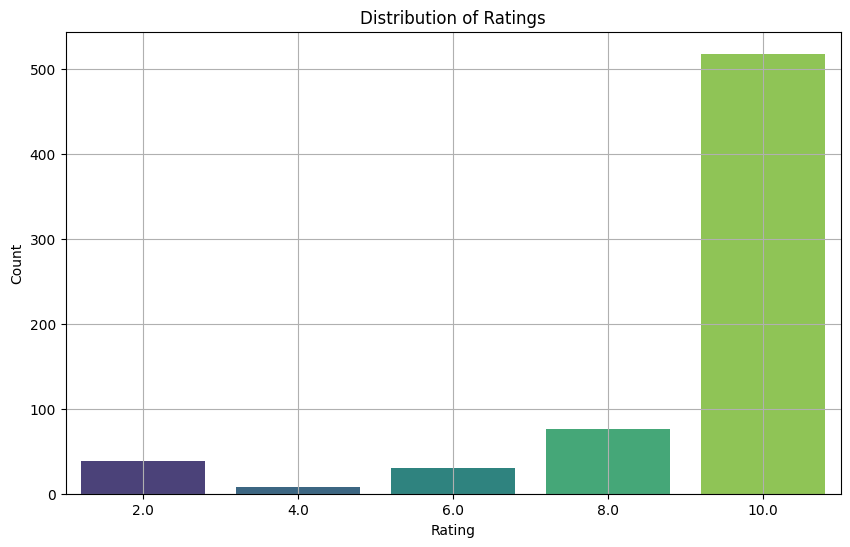

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the Ratings column
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)

plt.show()

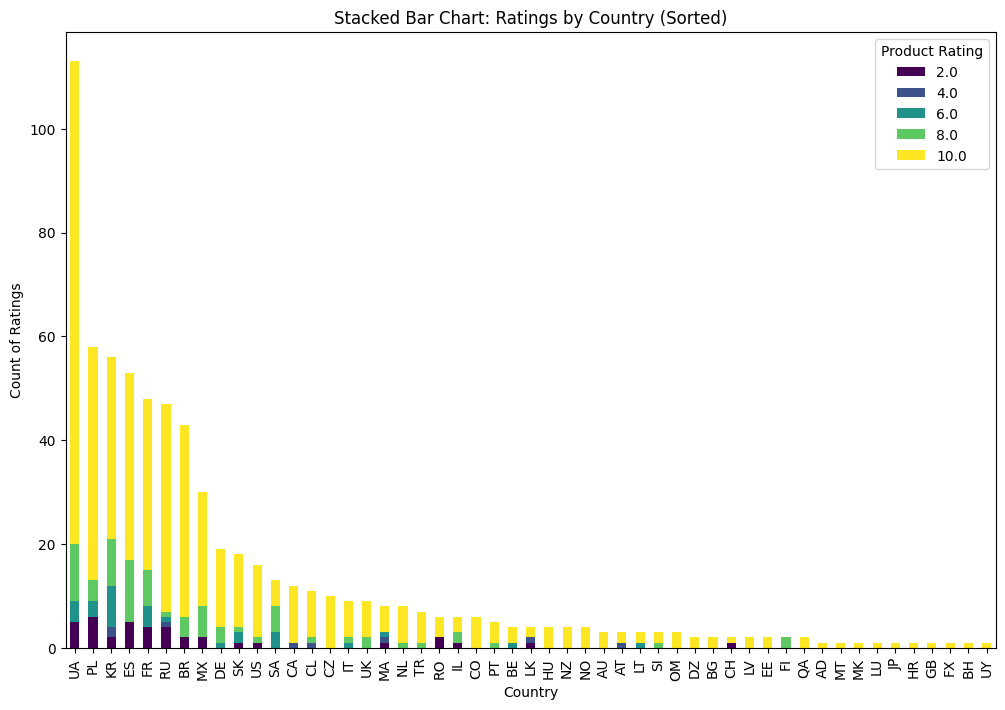

In [58]:
# Group by country and rating to get the count of ratings for each country
country_rating_counts = df.groupby(['Buyer Country', 'Rating']).size().unstack().fillna(0)

# Sort countries by total number of reviews
country_rating_counts['Total'] = country_rating_counts.sum(axis=1)  # Add a 'Total' column for sorting
country_rating_counts = country_rating_counts.sort_values(by='Total', ascending=False)  # Sort in descending order

# Create a stacked bar chart with sorted countries
country_rating_counts.drop(columns='Total').plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Stacked Bar Chart: Ratings by Country (Sorted)')
plt.xlabel('Country')
plt.ylabel('Count of Ratings')
plt.legend(title='Product Rating')
plt.show()

In [59]:
pip install wordcloud


In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

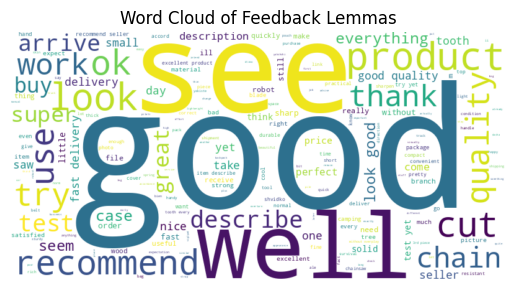

In [61]:
from wordcloud import WordCloud

# Flatten the list of word lists into a single list of words
all_lemmas = [word for sublist in df['feedback_lemmas'] for word in sublist]

# Join the words into a single string
text = ' '.join(all_lemmas)

# Create a word cloud from the lemmas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback Lemmas')
plt.show()

In [62]:
from collections import Counter
from nltk import ngrams

# Get a list of all tokens in feedback
all_tokens = df['feedback_lemmas'].sum()  # Flatten the list of tokens

# Count the most common words
word_counts = Counter(all_tokens)
print("Most common words:", word_counts.most_common(10),'\n')

# Find common bigrams
bigrams = list(ngrams(all_tokens, 2))
bigram_counts = Counter(bigrams)
print("Most common bigrams:", bigram_counts.most_common(10))

Most common words: [('good', 165), ('look', 69), ('see', 60), ('quality', 59), ('product', 58), ('well', 57), ('not', 55), ('recommend', 51), ('try', 46), ('cut', 44)] 

Most common bigrams: [(('do', 'not'), 26), (('look', 'good'), 22), (('have', 'not'), 21), (('good', 'quality'), 21), (('fast', 'delivery'), 17), (('not', 'try'), 15), (('test', 'yet'), 13), (('good', 'product'), 13), (('I', 'm'), 11), (('not', 'use'), 9)]


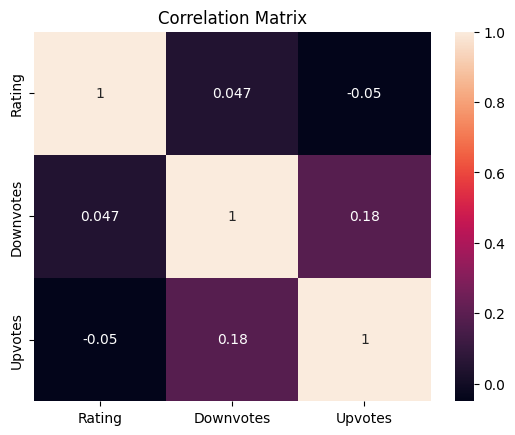

In [69]:
# Calculate correlation matrix
correlation_matrix = df[['Rating','Downvotes', 'Upvotes']].corr()

# Display the correlation matrix as a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [70]:
# Install and Import Libraries
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [73]:
# Apply sentiment analysis to 'buyerFeedback'
df['sentiment_score'] = df['Translation Feedback'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Classify sentiment based on the compound score
# Positive: score > 0.05, Negative: score < -0.05, Neutral: otherwise
df['sentiment'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral'
)

# Display the first few rows to check the output
print(df[['Translation Feedback', 'sentiment_score', 'sentiment']].head())

                                Translation Feedback  sentiment_score  \
0  was a great buy item according to the describe...           0.8555   
1  item as described visually everything is norma...           0.7351   
2  it has a good matter very thin chain i thought...           0.4601   
3  i havent tried it but it seems good enough to ...           0.5267   
4  bulo shvidko was delivered to kiev through the...           0.3612   

  sentiment  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  


<ipython-input-74-afbdad3d02b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df, palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'})


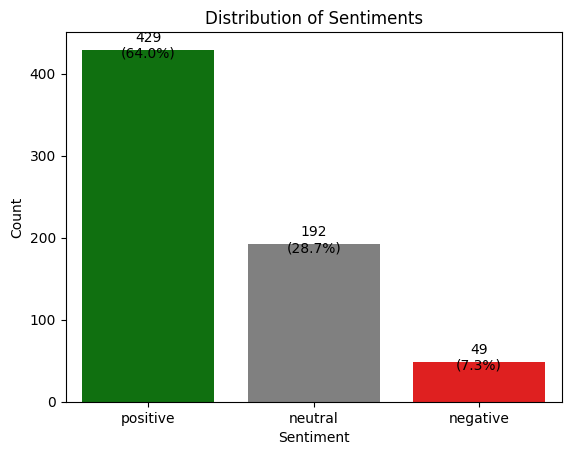

In [74]:
# Create the count plot with a specific color palette
ax = sns.countplot(x='sentiment', data=df, palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'})

# Set plot titles and labels
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Calculate total count for percentage calculation
total = len(df)

# Add data labels and percentages to each bar
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total  # Calculate the percentage
    # Add text with count and percentage
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 5,  # Position text slightly above the bar
        f'{height:.0f}\n({percentage:.1f}%)',  # Show count and percentage
        ha='center',  # Horizontal alignment
        va='center'  # Vertical alignment
    )

plt.show()

In [76]:
# Display the full text of 'buyerFeedback'
sample_reviews = df.sample(n=20, random_state=1)  # Select a random sample
for index, row in sample_reviews.iterrows():
    print(f"Review {index} ({df['sentiment'][index]})({df['Rating'][index]}): {row['Translation Feedback']}")

Review 657 (positive)(10.0): ok
Review 397 (neutral)(10.0): the product is in accordance with the declared
Review 304 (positive)(10.0): very well the product is perfect
Review 85 (negative)(10.0): quick cut for small branches bigger changes also cut but requires a lot of resistance in the arms
Review 60 (neutral)(10.0): 
Review 293 (positive)(8.0): in the absence of trying it it seems to me of a decent quality as shown in the specifications and photos

arrived fast and in perfect condition
Review 57 (positive)(10.0): good product and quality im really happy with it thanks a lot
Review 23 (positive)(10.0): i think it is an excellent product for the price beyond expectations
Review 277 (neutral)(10.0): as described
Review 248 (negative)(4.0): as a mediumsized wood cutter but gadi tortures you in your shoulder a good saw observed in it is only 11 years old walking how dirin in the picture drain dial sinan
Review 285 (positive)(6.0): good
Review 92 (positive)(10.0): excellent resists cuts 

<ipython-input-78-9d4dc4fb0939>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='Rating', data=df, palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'})


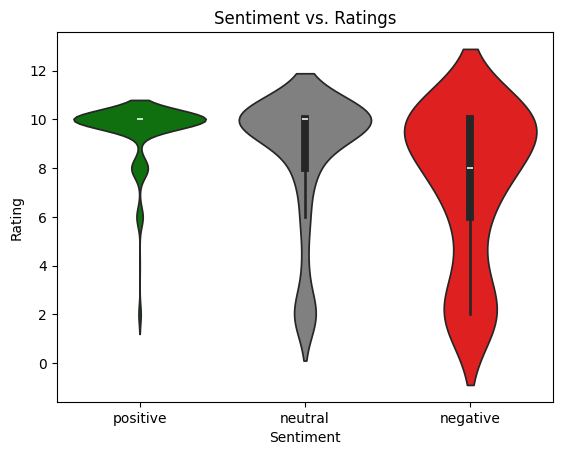

In [78]:
# Analyze sentiment in relation to ratings
sns.violinplot(x='sentiment', y='Rating', data=df, palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'})
plt.title('Sentiment vs. Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

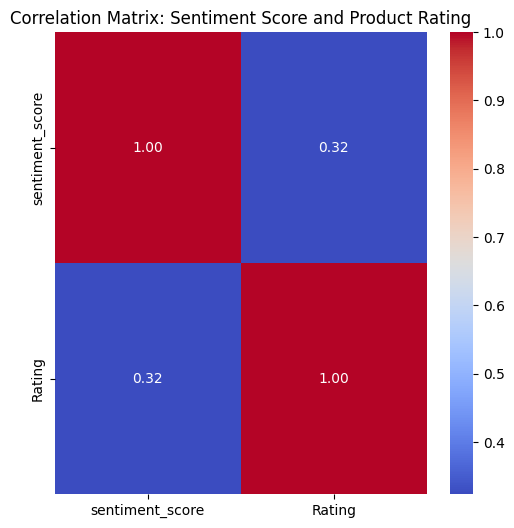

In [79]:
# Calculate the correlation matrix for sentiment score and product rating
correlation_matrix = df[['sentiment_score', 'Rating']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # 'annot=True' shows the correlation values
plt.title('Correlation Matrix: Sentiment Score and Product Rating')
plt.show()

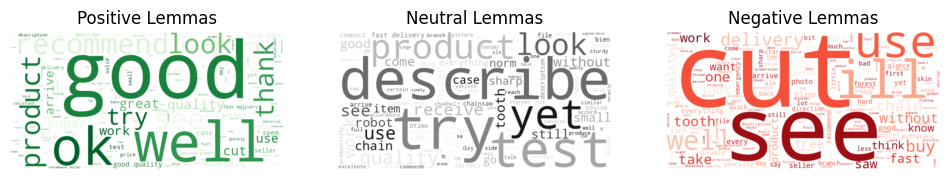

In [80]:
# Function to join words into a single string
def join_words(word_list):
    return ' '.join(word_list)

# Create a single text block for each sentiment using 'feedback_lemmas'
positive_lemmas_text = join_words([word for sublist in df[df['sentiment'] == 'positive']['feedback_lemmas'] for word in sublist])
negative_lemmas_text = join_words([word for sublist in df[df['sentiment'] == 'negative']['feedback_lemmas'] for word in sublist])
neutral_lemmas_text = join_words([word for sublist in df[df['sentiment'] == 'neutral']['feedback_lemmas'] for word in sublist])

# Generate word clouds for each sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_lemmas_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_lemmas_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greys').generate(neutral_lemmas_text)

# Display the word clouds for each sentiment
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Lemmas')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Lemmas')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Lemmas')

plt.show()

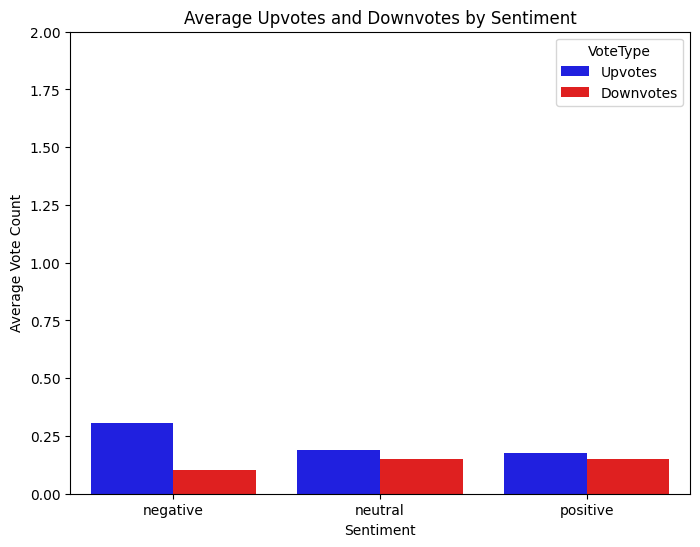

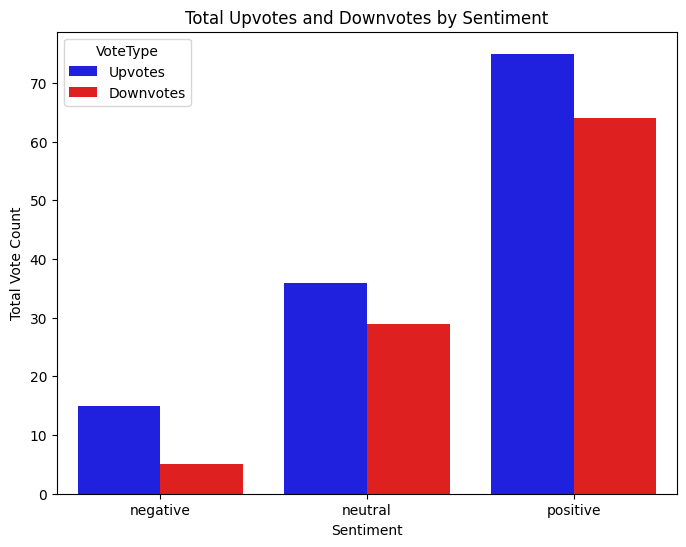

In [84]:
# Group data by sentiment and calculate the mean upvotes and downvotes
sentiment_votes = df.groupby('sentiment')[['Upvotes', 'Downvotes']].mean().reset_index()

# Create a long-form dataframe for plotting with Seaborn
sentiment_votes_melted = sentiment_votes.melt(id_vars='sentiment', var_name='VoteType', value_name='VoteCount')

# Create the grouped bar chart with y-axis limit set to a maximum of 3
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='VoteCount', hue='VoteType', data=sentiment_votes_melted, palette={'Upvotes': 'blue', 'Downvotes': 'red'})
plt.title('Average Upvotes and Downvotes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Vote Count')

# Set the y-axis limit with a maximum of 3
plt.ylim(0, 2)  # Minimum value 0, maximum value 3

plt.show()

# Group data by sentiment and calculate the sum upvotes and downvotes
sentiment_votes = df.groupby('sentiment')[['Upvotes', 'Downvotes']].sum().reset_index()

# Create a long-form dataframe for plotting with Seaborn
sentiment_votes_melted = sentiment_votes.melt(id_vars='sentiment', var_name='VoteType', value_name='VoteCount')

# Create the grouped bar chart with y-axis limit set to a maximum of 3
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='VoteCount', hue='VoteType', data=sentiment_votes_melted, palette={'Upvotes': 'blue', 'Downvotes': 'red'})
plt.title('Total Upvotes and Downvotes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Total Vote Count')
plt.show()